# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# # For testing the url and using Json to code params into 'try' loop 
# # Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = 'London'
# query_url = url + "appid=" + weather_api_key + "&q=" + city
# response = requests.get(query_url)
# data = response.json()
# # # Use json.dumps to print the json
# print(json.dumps(data, indent=4, sort_keys=True))


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city ################################
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        data = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data['coord']['lat']
        city_lng = data['coord']['lon']
        city_max_temp = data['main']['temp_max']
        city_humidity = data['main']['humidity']
        city_clouds = data['clouds']['all']
        city_wind = data['wind']['speed']
        city_country = data['sys']['country']
        city_date = data['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | langsa
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | vysokogornyy
Processing Record 5 of Set 1 | marzuq
Processing Record 6 of Set 1 | te anau
Processing Record 7 of Set 1 | usinsk
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | champerico
Processing Record 11 of Set 1 | balikpapan
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | gilgit
Processing Record 19 of Set 1 | saint george
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | san felipe
Proce

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,langsa,4.4683,97.9683,29.77,59,86,0.98,ID,1676516361
1,bengkulu,-3.8004,102.2655,27.70,68,98,0.84,ID,1676516361
2,vaini,-21.2000,-175.2000,29.09,84,75,5.14,TO,1676516361
3,vysokogornyy,50.1167,139.1500,-16.25,81,90,2.73,RU,1676516362
4,marzuq,14.4000,46.4667,14.51,15,5,2.59,YE,1676516362


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,langsa,4.4683,97.9683,29.77,59,86,0.98,ID,1676516361
1,bengkulu,-3.8004,102.2655,27.70,68,98,0.84,ID,1676516361
2,vaini,-21.2000,-175.2000,29.09,84,75,5.14,TO,1676516361
3,vysokogornyy,50.1167,139.1500,-16.25,81,90,2.73,RU,1676516362
4,marzuq,14.4000,46.4667,14.51,15,5,2.59,YE,1676516362


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

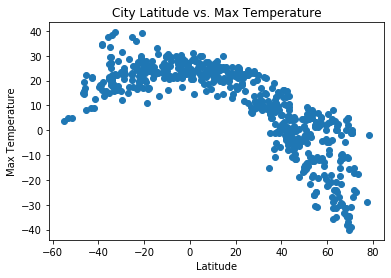

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

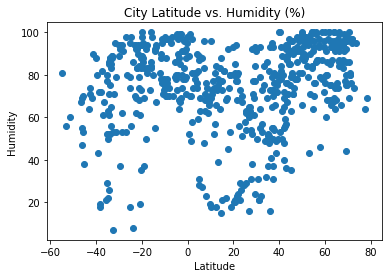

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(x_values,humidity)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

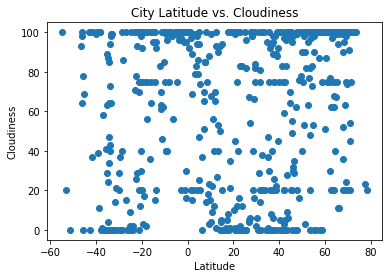

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
plt.scatter(x_values,clouds)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

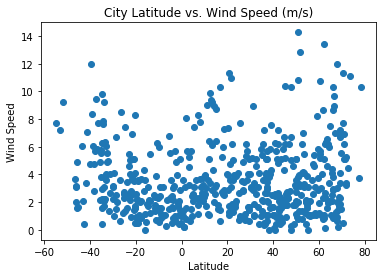

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
wind = city_data_df['Wind Speed']
plt.scatter(x_values, wind)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values = x_values * slope + intercept
print(line_eq)

y = -0.38x +17.51


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0] 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,langsa,4.4683,97.9683,29.77,59,86,0.98,ID,1676516361
3,vysokogornyy,50.1167,139.1500,-16.25,81,90,2.73,RU,1676516362
4,marzuq,14.4000,46.4667,14.51,15,5,2.59,YE,1676516362
6,usinsk,65.9939,57.5281,-11.62,91,100,8.67,RU,1676516363
9,champerico,14.3000,-91.9167,25.28,77,0,2.02,GT,1676516364


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bengkulu,-3.8004,102.2655,27.70,68,98,0.84,ID,1676516361
2,vaini,-21.2000,-175.2000,29.09,84,75,5.14,TO,1676516361
5,te anau,-45.4167,167.7167,22.15,38,69,1.64,NZ,1676516345
7,saint-pierre,-21.3393,55.4781,24.39,68,0,3.60,RE,1676516363
8,rikitea,-23.1203,-134.9692,26.27,70,100,2.62,PF,1676516364


###  Temperature vs. Latitude Linear Regression Plot

The correlation between temperature and latitude is -0.84


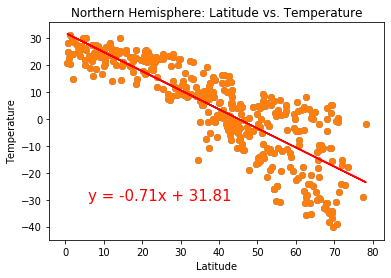

In [26]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between temperature and latitude is {round(correlation[0],2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere: Latitude vs. Temperature')
plt.show()

The correlation between tumor volume and mouse weight is 0.4


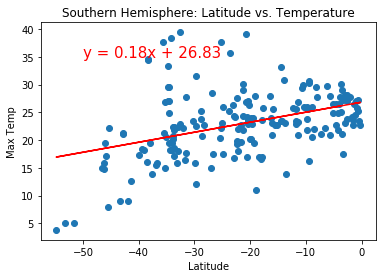

In [27]:
# Linear regression on Southern Hemisphere

z_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

correlation = st.pearsonr(z_values,y_values)
print(f"The correlation between tumor volume and mouse weight is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(z_values, y_values)
regress_values = z_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(z_values, y_values)
plt.plot(z_values,regress_values,"r-")
plt.annotate(line_eq,(-50,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere: Latitude vs. Temperature')
plt.show()

**Discussion about the linear relationship:** This relationship is different between each hemisphere. Norhtern cities had a stronger correlation that was negative, while the southern cities had a weaker and positive correlation. This suggests that these cities may well have other factors at play (cloudiness, wind speed, altitude, etc.) that weaken the correlation between latitude and max temperature in the southern hemisphere, while factors such as tree density or proximity to the northern pole could play a stronger role for this northen city sample. 

### Humidity vs. Latitude Linear Regression Plot

The correlation between humidity and latitude is 0.42


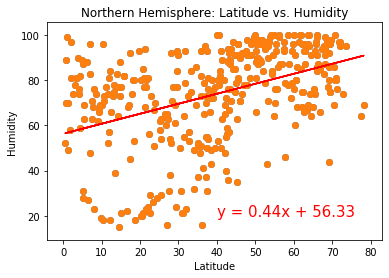

In [29]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between humidity and latitude is {round(correlation[0],2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Latitude vs. Humidity')
plt.show()

The correlation between humidity & southern latitude is 0.39


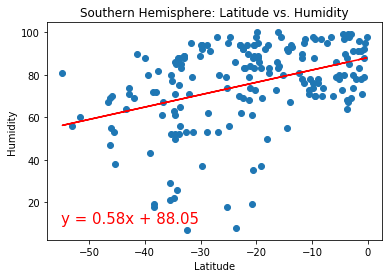

In [30]:
# Southern Hemisphere

south_lat = southern_hemi_df['Lat']
south_humid = southern_hemi_df['Humidity']

correlation = st.pearsonr(south_lat,south_humid)
print(f"The correlation between humidity & southern latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_humid)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Latitude vs. Humidity')
plt.show()

**Discussion about the linear relationship:** The correlations between both humidity and latitude for each hemisphere were weak and posititve, yet almost identical between both calculations, emphasizing that perhaps humidity is the result of a much more complex system that spans the globe and perhaps includes variables like proximities to coastlines or altitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between cloudiness and latitude is 0.27


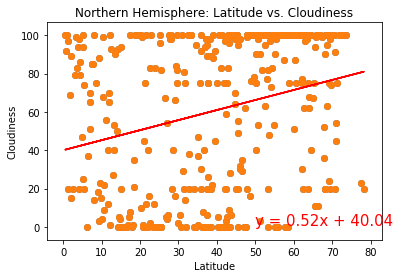

In [32]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between cloudiness and latitude is {round(correlation[0],2)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness')
plt.show()

The correlation between latitude and cloudiness is 0.37


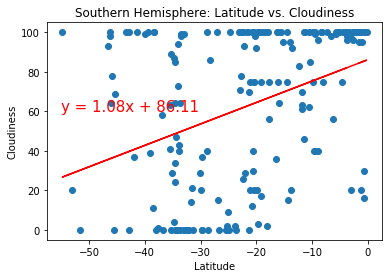

In [34]:
# Southern Hemisphere

south_lat = southern_hemi_df['Lat']
south_clouds = southern_hemi_df['Cloudiness']

correlation = st.pearsonr(south_lat,south_clouds)
print(f"The correlation between latitude and cloudiness is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_clouds)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_clouds)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness')
plt.show()

**Discussion about the linear relationship:** The correlations between both cloudiness and latitude for each hemisphere were weak and posititve, yet almost identical between both calculations, emphasizing that perhaps cloudiness is the result of a much more complex system that spans the globe and is therefore not directly linked to latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between wind speed and latitude is 0.08


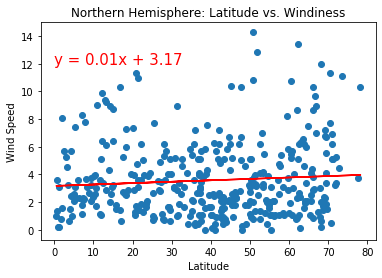

In [36]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed']

correlation = st.pearsonr(north_lat, north_wind)
print(f"The correlation between wind speed and latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Latitude vs. Windiness')
plt.show()

The correlation between wind speed and latitude is -0.45


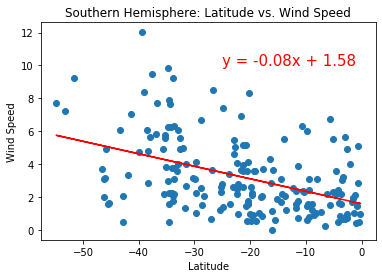

In [38]:
# Southern Hemisphere
south_wind = southern_hemi_df['Wind Speed']

correlation = st.pearsonr(south_lat,south_wind)
print(f"The correlation between wind speed and latitude is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed')
plt.show()

**Discussion about the linear relationship:** While this data set was large enough to measure the correlation between weather patterns with various latitudes, these linear regression models showed the weakest correlations, meaning that windspeed is much more broad and complex system that spans many degrees of latitude and is therefore not affected by it. 